In [14]:
# Imports
import pandas as pd
import numpy as np
from random import shuffle
from math import pi
from statistics import stdev, mean
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

# Assignment 2, Part 1:  
Create a list of the atomic weights of the first six elements of the periodic table, each rounded to the nearest integer. Provide two pie charts as follows: (1) each slice annotated with a percentage of the whole and (2) each slice annotated with its atomic weight. Explode a different element with each chart.

In [15]:
data = pd.read_csv("assignment2.csv")

In [16]:
data["AtomicWeight"] = [1,4,6,9,10,12]
data

,Name,Symbol,AtomicNumber,AtomicWeight
0,Hydrogen,H,1,1
1,Helium,He,2,4
2,Lithium,Li,3,6
3,Beryllium,Be,4,9
4,Boron,Be,5,10
5,Carbon,C,6,12


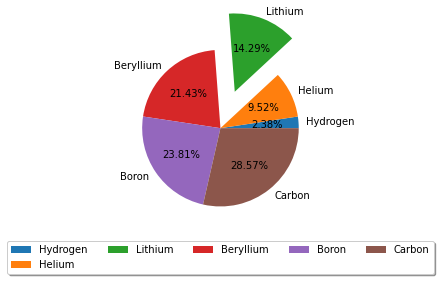

<Figure size 800x800 with 0 Axes>

In [17]:
# Pie chart: Percentage
# We explode the Lithium
explode = [0,0,0.5,0,0,0]
# Labels
labels = data["Name"]
ax = plt.subplot()
ax.pie(data["AtomicWeight"], explode=explode, autopct='%1.2f%%', labels = labels)
plt.figure(figsize=(10, 10), dpi=80)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
plt.show() 

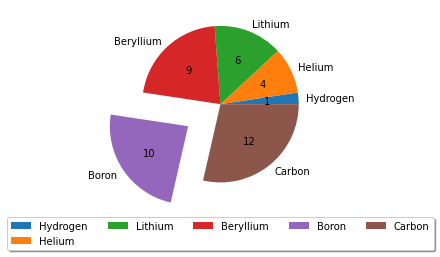

<Figure size 800x800 with 0 Axes>

In [18]:
# Pie chart: Atomic Weight
# We explode the Boron
explode = [0,0,0,0,0.5,0]
# Labels
labels = data["Name"]
ax = plt.subplot()
# Atomic weights
ax.pie(data["AtomicWeight"], explode=explode, autopct= lambda p: "{:.0f}".format(p * sum(data["AtomicWeight"]/100.0)) ,labels = labels)
plt.figure(figsize=(10, 10), dpi=80)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
plt.show() 

# Assignment 2, Part 2
Read into a DataFrame the file py_ide2.csv, and provide both a horizontal bar chart and a vertical bar chart, complete with all labels. Be sure to rotate the IDE names so that they are readable.

In [19]:
data = pd.read_csv("py_ide2.csv")
print(data.info())
print(data.head(n=10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IDE       13 non-null     object 
 1   Adoption  13 non-null     float64
dtypes: float64(1), object(1)
memory usage: 336.0+ bytes
None
            IDE  Adoption
0       Jupyter      57.0
1       PyCharm      35.0
2        Spyder      27.0
3       VS Code      21.0
4  Sublime Text      12.0
5          Atom      10.0
6           Vim       8.5
7   another IDE       3.1
8       Eclipse       3.0
9    another ed       2.5


[Text(0.0, 0, 'Jupyter'),
 Text(1.0, 0, 'PyCharm'),
 Text(2.0, 0, 'Spyder'),
 Text(3.0, 0, 'VS Code'),
 Text(4.0, 0, 'Sublime Text'),
 Text(5.0, 0, 'Atom'),
 Text(6.0, 0, 'Vim'),
 Text(7.0, 0, 'another IDE'),
 Text(8.0, 0, 'Eclipse'),
 Text(9.0, 0, 'another ed'),
 Text(10.0, 0, 'Emacs'),
 Text(11.0, 0, 'gedit'),
 Text(12.0, 0, 'Rodeo')]

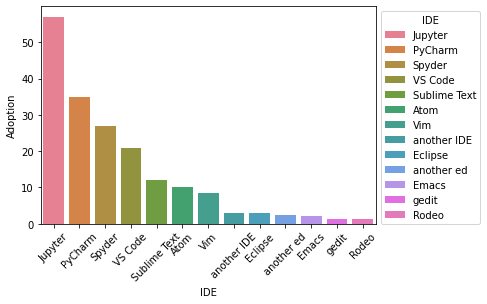

In [20]:
ax = sns.barplot(data=data, x = "IDE", y = "Adoption", orient="v", hue="IDE" ,legend=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_xticks(data["IDE"])
ax.set_xticklabels(ax.get_xticklabels() , rotation=45)

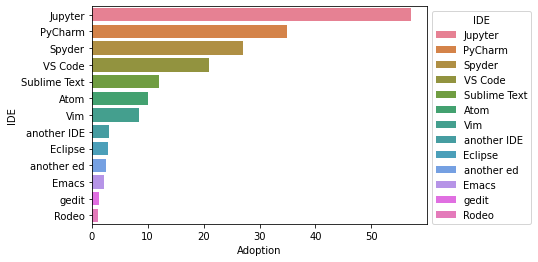

In [21]:
ax = sns.barplot(data=data, x = "Adoption", y = "IDE", orient="h", hue="IDE" ,legend=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Assignment 2, Part 3
Construct a list of eight strings that represent days evenly spread out. Drawing from the random uniform distribution, make an array of eight floats ranging from 100 to 200 in value. Establish a DataFrame from that list and that array, convert the dates to pandas datetime objects, and set them to the index. Make two charts in the same window or canvas as follows: (1) a line plot of the values vs. dates and (2) a bar chart of the same.

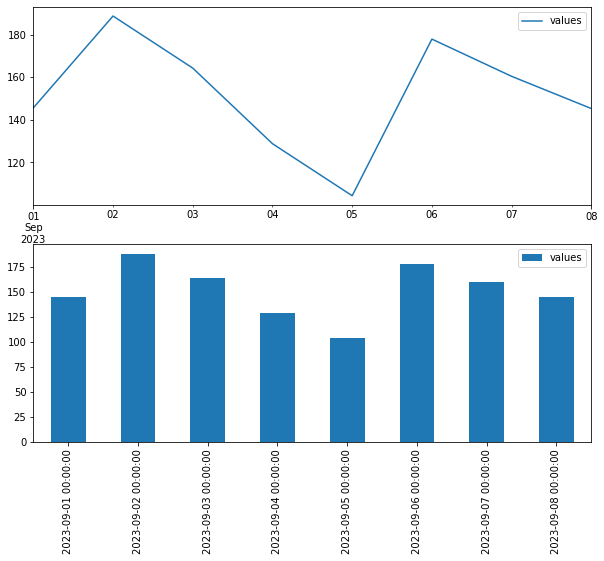

In [22]:
# Construct a list of eight strings that represent days evenly spread out
days = pd.date_range(start='2023-09-01', periods=8).strftime('%Y-%m-%d').tolist()

# Drawing from the random uniform distribution, make an array of eight floats ranging from 100 to 200 in value
values = np.random.uniform(low=100, high=200, size=8)

# Establish a DataFrame from that list and that array, convert the dates to pandas datetime objects, and set them to the index
df = pd.DataFrame({'values': values}, index=pd.to_datetime(days))

# Make two charts in the same window or canvas as follows: 
# (1) a line plot of the values vs. dates
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
df.plot(kind='line', ax=ax[0])
# (2) a bar chart of the same
df.plot(kind='bar', ax=ax[1])
plt.show()

# Assignment 2, Part 4:  
Pull from Yahoo! Finance the closing prices and volumes of the stock of your choice over the trading days of one month, and plot the prices and volumes on a canvas in two separate panels, one above the other, with the dates aligned.

In [23]:
stonk = "GOOG"

In [24]:
goog = yf.Ticker(stonk)
hist = goog.history(period="1mo")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-08-30 00:00:00-04:00,135.570007,137.250000,135.020996,136.929993,21773400,0.0,0.0
2023-08-31 00:00:00-04:00,137.050003,138.399994,136.820007,137.350006,28147900,0.0,0.0
2023-09-01 00:00:00-04:00,138.429993,138.580002,135.940002,136.800003,16665700,0.0,0.0
2023-09-05 00:00:00-04:00,136.440002,137.369995,135.559998,136.710007,17730200,0.0,0.0
2023-09-06 00:00:00-04:00,137.014999,137.479996,134.690002,135.369995,15814300,0.0,0.0
2023-09-07 00:00:00-04:00,134.600006,136.580002,133.960007,136.199997,16976000,0.0,0.0
2023-09-08 00:00:00-04:00,135.869995,137.514999,135.869995,137.199997,17810700,0.0,0.0
2023-09-11 00:00:00-04:00,137.380005,138.264008,136.550003,137.740005,17180800,0.0,0.0
2023-09-12 00:00:00-04:00,137.130005,137.639999,135.929993,136.070007,15212900,0.0,0.0


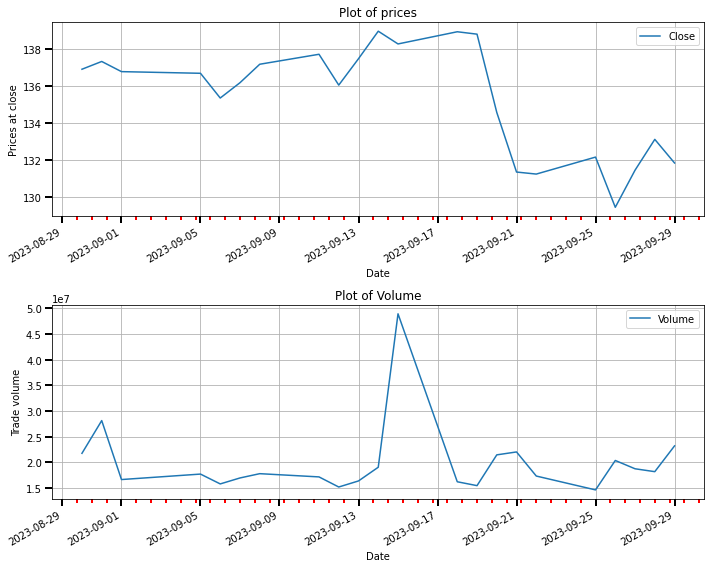

In [34]:
from matplotlib.ticker import AutoMinorLocator
# (1) Plot of prices
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
df = hist[["Close"]]
df.plot(kind='line', ax=ax[0])
# (2) Plot of volume
df = hist[["Volume"]]
df.plot(kind='line', ax=ax[1])

# Labels
ax0 = ax[0]
ax0.grid(True)
ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax0.tick_params(which='both', width=2)
ax0.tick_params(which='major', length=7)
ax0.tick_params(which='minor', length=4, color='r')
ax0.set_title("Plot of prices")
ax0.set_xlabel("Date")
ax0.set_ylabel("Prices at close")
ax1 = ax[1]
ax1.set_title("Plot of Volume")
ax1.set_xlabel("Date")
ax1.set_ylabel("Trade volume")
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4, color='r')
ax1.grid(True)
# This line adds enough space between 
plt.tight_layout()
#plt.grid()
plt.show()